In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd

In [7]:
path = '/content/drive/MyDrive/players_22.csv'
players = pd.read_csv(path)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
players

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [9]:
features = ["overall", "potential", "wage_eur", "value_eur", "age" ]

In [10]:
players = players.dropna(subset=features)

In [13]:
data = players[features].copy()
 #copy creasted to do clustering

In [14]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


1. Scaling the data as each feature have diff range of values.
2. Initialise random centroids
3. Label each data point
4. Update centroids
5. Repeat 3,4 until centroids stop changing

In [15]:
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1
#min-max scaling to keep the values between range 1-10

In [16]:
data.describe()
#variance is still preserved as one player can be way better than other

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [28]:
def random_centroids(data, k):
  centroids = []
  for i in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    #random sample each row and gives converted to float
    centroids.append(centroid)
  return pd.concat(centroids, axis = 1)


In [29]:
centroids = random_centroids(data, 5)

In [30]:
centroids

,0,1,2,3,4
overall,1.586957,6.086957,3.347826,2.956522,5.108696
potential,5.304348,5.500000,6.282609,5.500000,4.521739
wage_eur,1.038627,1.115880,1.012876,1.003863,1.000000
value_eur,1.028579,1.078452,1.097010,1.033218,1.010253
age,1.666667,2.333333,2.666667,4.000000,3.000000


In [37]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
  return distances.idxmin(axis=1)

In [38]:
labels = get_labels(data, centroids)

In [39]:
labels.value_counts()

4    6715
3    4138
1    3666
2    3254
0    1392
dtype: int64

In [43]:
#update the centers based on geometric mean
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T 
# split data based on each cluster
# for each cluster, we calculae the geometric mean of each feature

In [47]:
from sklearn.decomposition import PCA
#PCA is used to visualise the 5 dimensional data or help us graph our cluster
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [49]:
def plot_clusters(data, labels, centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration{iteration}')
  plt.scatter(x=data_2d[:,0], y =data_2d[:,1], c=labels)
  plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
  plt.show()

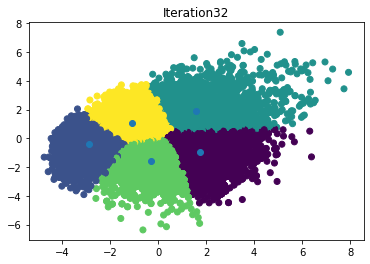

In [52]:
max_iterations = 100
k = 5

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids

  labels = get_labels(data, centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration +=1

In [53]:
centroids

,0,1,2,3,4
overall,5.446483,2.519122,6.517124,4.066973,4.327960
potential,5.100842,4.434900,6.883245,3.994575,5.880447
wage_eur,1.203941,1.016136,1.716155,1.046234,1.074044
value_eur,1.071908,1.013574,1.485289,1.026739,1.062819
age,5.892670,2.302803,3.944846,4.680770,2.685194


In [56]:
players[labels ==2][["short_name"] + features]
#Star Players

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6214,J. Garner,69,84,26000.0,3200000.0,20
6230,C. Gutiérrez,69,81,6000.0,3400000.0,22
6254,Iñaki Peña,69,80,29000.0,2700000.0,22
6265,Jaume Grau,69,78,10000.0,2900000.0,24


In [57]:
players[labels ==1][["short_name"] + features]
#younger players high pontential

,short_name,overall,potential,wage_eur,value_eur,age
11593,Raphael Doninho,64,64,5000.0,700000.0,21
12250,D. Ferdiz,63,63,500.0,500000.0,21
13640,Dêniro Prestes,62,62,2000.0,475000.0,21
13641,Raullino Meneses,62,62,2000.0,425000.0,21
14368,Jája Silva,62,66,2000.0,575000.0,22
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [58]:
players[labels ==0][["short_name"] + features]
#older players

,short_name,overall,potential,wage_eur,value_eur,age
97,Z. Ibrahimović,84,84,51000.0,14500000.0,39
199,Pepe,82,82,14000.0,5500000.0,38
201,Ł. Fabiański,82,82,43000.0,3400000.0,36
284,Joaquín,81,81,23000.0,8500000.0,39
285,B. Yılmaz,81,81,39000.0,11000000.0,35
...,...,...,...,...,...,...
14405,J. McNulty,61,61,1000.0,60000.0,36
14406,C. Gauseth,61,61,650.0,100000.0,37
14850,R. Rivas,61,61,500.0,35000.0,36
14924,R. Costin,61,61,1000.0,60000.0,36


In [59]:
from sklearn.cluster import KMeans

In [62]:
kmeans = KMeans(5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [63]:
centroids = kmeans.cluster_centers_

In [64]:
pd.DataFrame(centroids, columns=features).T

,0,1,2,3,4
overall,4.926921,5.615906,7.072421,4.191866,2.971078
potential,6.104673,5.254364,7.253208,4.060983,4.859783
wage_eur,1.147486,1.255107,2.259790,1.050508,1.021147
value_eur,1.095538,1.081788,1.885489,1.027383,1.019118
age,3.118594,6.075402,4.373271,4.924961,2.423269
